In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import exp, sqrt, pi, cos, sin
from scipy.integrate import dblquad, tplquad, quad
import cmath

## Define a class for the hydrogenic atom

This class has wavefunctions and energies. It is based on Chapter 10 of *Physical Chemistry, 8th Ed* by Atkins and De Paula. My goal is to reproduce the plots in the book and thereby reinforce my memory of how the physical systems work.

In [2]:
class HydrogenicAtom:
    """
    This class models the wavefunctions and energy levels of a hydrogenic atom.
    
    It assumes an infinitely heavy nucleus, so the mass is that of the
    electron.
    
    Masses are in kg, distances are in m
    
    This whole class uses complex numbers and math functions.
    """
    
    def __init__(self, n=1, l=0, ml=0, z=1):
        """
        This sets some instance attributes and a few constant used throughout the
        class.
        
        Leave z at 1 for hydrogen.
        
        Parameters
        ----------    
        n: int
            Principal quantum number.
            
        l: int
            Orbital angular momentum quantum number.
            
        ml: int
            Magnetic quantum number.
            
        z: int
            Number of protons in the nucleus. Defaults to 1.
        """
        self.a0 = 5.29e-11       # m
        self.me = 9.10938356e-31 # kg
        self.e0 = 8.85418782e-12 # Permitivity of free space
        self.e_charge = 1.60217662e-19 # Coulombs, charge of electron
        self.hbar = 1.054571817e-34  # Reduced Planck's constant
        self.n = n
        self.l = l
        self.ml = ml
        self.z = z
        
    def rho(self, r):
        """
        Calculates the rho part of the radial function. It assumes an infinitely
        heavy nucleus.
        
        From Atkins and de Paula, Table 10.1, page 324
        
        Parameters
        ----------
        r: float
            The distance, in meters being calculated
            
        Returns
        -------
        float
            The value of rho.
        """
        return (2 * self.z / self.n / self.a0) * r
    
    def radial(self, r):
        """
        The radial part of the wavefunction
        
        Parameters
        ----------
        r: float
            Radius, in meters
            
        Returns
        -------
        complex
            The value of the radial wavefunction, which only uses the real
            part of the complex value.
            
        Raises
        ------
        Exception
            Raises an exception for invalid n and l
        """
        za32 = (self.z / self.a0) ** (3/2)
        rho = self.rho(r)
        exp_rho = exp(-rho / 2.0)
        
        if self.n == 1 and self.l == 0:  # 1s orbital
            return 2 * za32 * exp_rho
        elif self.n == 2 and self.l == 0:  # 2s orbital
            return (1.0 / sqrt(8)) * za32 * (2.0 - rho) * exp_rho
        elif self.n == 2 and self.l == 1:  # 2p orbital
            return (1.0 / sqrt(24)) * za32 * rho * exp_rho
        elif self.n == 3 and self.l == 0:
            return (1.0 / sqrt(243)) * za32 * (6.0 - 6 * rho + rho ** 2) * exp_rho
        elif self.n == 3 and self.l == 1:
            return (1.0 / sqrt(486)) * za32 * (4.0 - rho) * rho * exp_rho
        elif self.n == 3 and self.l == 2:
            return (1.0 / sqrt(2430)) * za32 * rho ** 2 * exp_rho
        else:
            raise Exception(f'No radial function for {self.n} and {self.l}')
            
    def spherical_harmonic(self, theta, phi):
        """
        Find the value of the spherical harmonic given an quantum numbers
        l, ml and coordinates theta, phi.
        
        From Atkins and de Paula, Table 9.3, page 302
        
        Parameters
        ----------    
        theta: float
            Theta coordinate, from 0 to pi

        phi: float
            Phi coordinate, from 0 to 2*pi
            
        Returns
        -------
        complex
            The value of the spherical harmonic, which is a complex value
            
        Raises
        ------
        Exception
            Raises an Exception for an invalid combination of l and ml
        """
        if self.l == 0 and self.ml == 0:
            return sqrt(1 / 4.0 / pi)
        
        elif self.l == 1 and self.ml == 0:
            return sqrt(3.0 / 4.0 / pi) * cos(theta)
        elif self.l == 1 and self.ml == 1:
            return -sqrt(3.0 / 8.0 / pi) * sin(theta) * cmath.exp(1j * phi)
        elif self.l == 1 and self.ml == -1:
            return -sqrt(3.0 / 8.0 / pi) * sin(theta) * cmath.exp(-1j * phi)
        
        elif self.l == 2 and self.ml == 0:
            return sqrt(5.0 / 16.0 / pi) * (3 * cos(theta)** 2 - 1)
        elif self.l == 2 and self.ml == 1:
            return -sqrt(15.0 / 8.0 / pi) * cos(theta) * sin(theta) * cmath.exp(1j * phi)
        elif self.l == 2 and self.ml == -1:
            return sqrt(15.0 / 8.0 / pi) * cos(theta) * sin(theta) * cmath.exp(-1j * phi)
        elif self.l == 2 and self.ml == 2:
            return sqrt(15.0 / 32.0 / pi) * sin(theta) ** 2 * cmath.exp(2j * phi)
        elif self.l == 2 and self.ml == -2:
            return sqrt(15.0 / 32.0 / pi) * sin(theta) ** 2 * cmath.exp(-2j * phi)
        
        elif self.l == 3 and self.ml == 0:
            return sqrt(7.0 / 16.0 / pi) * (5 * cos(theta) ** 3 - 3 * cos(theta))
        elif self.l == 3 and self.ml == 1:
            return -sqrt(21.0 / 64.0 / pi) * (5 * cos(theta) ** 2 - 1) * sin(theta) * cmath.exp(1j * phi)
        elif self.l == 3 and self.ml == -1:
            return sqrt(21.0 / 64.0 / pi) * (5 * cos(theta) ** 2 - 1) * sin(theta) * cmath.exp(-1j * phi)
        elif self.l == 3 and self.ml == 2:
            return sqrt(105.0 / 32.0 / pi) * sin(theta) ** 2 * cos(theta) * cmath.exp(2j * phi)
        elif self.l == 3 and self.ml == -2:
            return sqrt(105.0 / 32.0 / pi) * sin(theta) ** 2 * cos(theta) * cmath.exp(-2j * phi)
        elif self.l == 3 and self.ml == 3:
            return -sqrt(35.0 / 64.0 / pi) * sin(theta) ** 3 * cmath.exp(3j * phi)
        elif self.l == 3 and self.ml == -3:
            return sqrt(35.0 / 64.0 / pi) * sin(theta) ** 3 * cmath.exp(-3j * phi)
        
        else:
            raise Exception(f'No equation for l={self.l} and ml={self.ml}')
            
    def energy(self):
        """
        This calcuates the energy in Joules of the electron at the n level of this
        atoms configuration.
        
        It makes the infinite mas approximation for the nucleus, so the mass in
        the expression is that of the electron.
        
        From page 324 of Atkins and de Paula
        
        Returns
        -------
        float, float
            First float is energy level in joules, second float is energy level in eV
        """
        ev_per_joule = 6.242e+18
        numerator = self.z**2 * self.me * self.e_charge**4
        denominator = 32 * pi**2 * self.e0**2 * self.hbar**2 * self.n**2
        value = numerator / denominator
        joules = -value
        ev = joules * ev_per_joule
        return joules, ev

## Check the spherical harmonics

Make sure all the spherical harmonics are normalized. That means each of the the spherical harmonic functions must stasify the following expression:

$$ \int_0^{\pi} \int_0^{2\pi} \lvert Y_{l, m_l} \rvert ^2 \sin \theta d \theta d \phi = 1 $$

The next block of code takes the spherical harmonic for each parameter set of l and ml and numerically integrates it to ensure that the result is 1.0, within floating point precision. A report of the parameters and the results follows.

In [3]:
parameters = [
    { 'n': 3, 'l': 0, 'ml': 0 },
    { 'n': 3, 'l': 1, 'ml': 0 },
    { 'n': 3, 'l': 1, 'ml': 1 },
    { 'n': 3, 'l': 1, 'ml': -1 },
    { 'n': 3, 'l': 2, 'ml': 0 },
    { 'n': 3, 'l': 2, 'ml': 1 },
    { 'n': 3, 'l': 2, 'ml': -1 },
    { 'n': 3, 'l': 2, 'ml': 2 },
    { 'n': 3, 'l': 2, 'ml': -2 },
    { 'n': 3, 'l': 3, 'ml': 0 },
    { 'n': 3, 'l': 3, 'ml': 1 },
    { 'n': 3, 'l': 3, 'ml': -1 },
    { 'n': 3, 'l': 3, 'ml': 2 },
    { 'n': 3, 'l': 3, 'ml': -2 },
    { 'n': 3, 'l': 3, 'ml': 3 },
    { 'n': 3, 'l': 3, 'ml': -3 }
]

for p in parameters:
    ha = HydrogenicAtom(n=p['n'], l=p['l'], ml=p['ml'])
    def integrand(phi,theta):
        value = ha.spherical_harmonic(theta, phi)
        return abs(value) ** 2 * sin(theta).real
    p['result'], _ = dblquad(integrand, 0, pi, 0, 2 * pi)
    
for p in parameters:
    print(p)

{'n': 3, 'l': 0, 'ml': 0, 'result': 0.9999999999999999}
{'n': 3, 'l': 1, 'ml': 0, 'result': 1.0}
{'n': 3, 'l': 1, 'ml': 1, 'result': 0.9999999999999999}
{'n': 3, 'l': 1, 'ml': -1, 'result': 0.9999999999999999}
{'n': 3, 'l': 2, 'ml': 0, 'result': 1.0000000000000002}
{'n': 3, 'l': 2, 'ml': 1, 'result': 1.0}
{'n': 3, 'l': 2, 'ml': -1, 'result': 1.0}
{'n': 3, 'l': 2, 'ml': 2, 'result': 1.0}
{'n': 3, 'l': 2, 'ml': -2, 'result': 1.0}
{'n': 3, 'l': 3, 'ml': 0, 'result': 1.0}
{'n': 3, 'l': 3, 'ml': 1, 'result': 1.0000000000000002}
{'n': 3, 'l': 3, 'ml': -1, 'result': 1.0000000000000002}
{'n': 3, 'l': 3, 'ml': 2, 'result': 0.9999999999999998}
{'n': 3, 'l': 3, 'ml': -2, 'result': 0.9999999999999998}
{'n': 3, 'l': 3, 'ml': 3, 'result': 1.0000000000000004}
{'n': 3, 'l': 3, 'ml': -3, 'result': 1.0000000000000004}


## Plots of the radial functions

Figure 1 has plots of the radial functions for various combinations of n and l. Some of the subplots are blank because there is no corresponding radial function for their position on the chart.

Text(0.5, 1.0, 'intentionally blank')

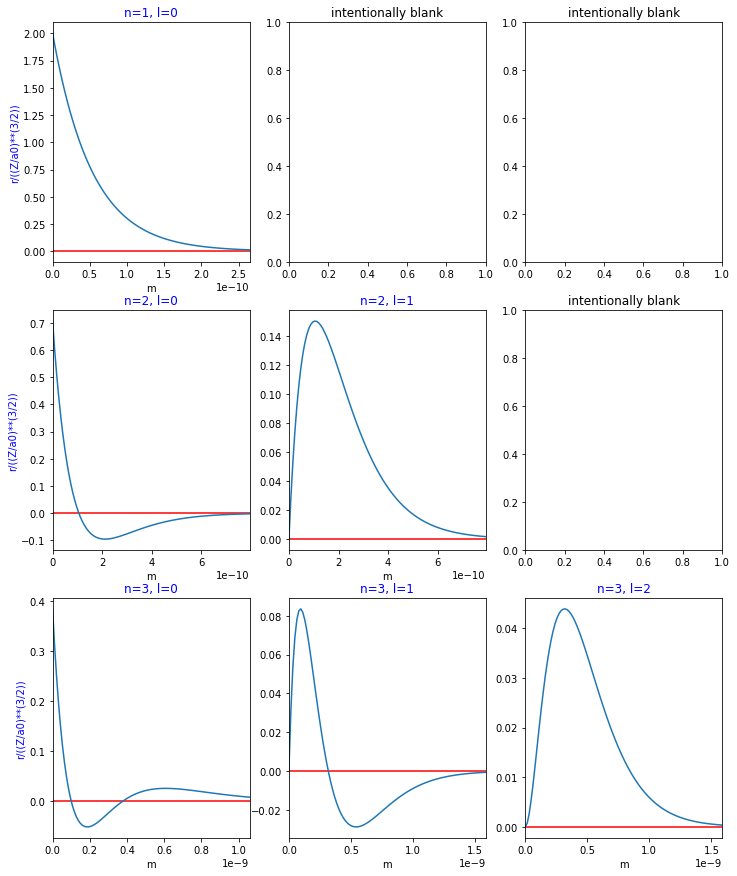

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 15))

# Just so I can access instance variables in an instance to make the dictionary.
ha = HydrogenicAtom()
yscaler = (ha.z / ha.a0)**(3/2)

parameters = [
    {'n': 1, 'l': 0, 'x_scaler': 5, 'yscaler':  yscaler },
    {'n': 2, 'l': 0, 'x_scaler': 15, 'yscaler': yscaler },
    {'n': 3, 'l': 0, 'x_scaler': 20, 'yscaler': yscaler },
    {'n': 2, 'l': 1, 'x_scaler': 15, 'yscaler': yscaler },
    {'n': 3, 'l': 1, 'x_scaler': 30, 'yscaler': yscaler },
    {'n': 3, 'l': 2, 'x_scaler': 30, 'yscaler': yscaler }
]

for p in parameters:
    row = p['n'] - 1
    col = p['l']
    ha = HydrogenicAtom(n=p['n'], l=p['l'])
    xs = np.linspace(0, ha.a0 * p['x_scaler'], 100)
    ys = [ha.radial(r) / p['yscaler'] for r in xs]
    ax = axs[row, col]
    ax.set_title(f'n={p["n"]}, l={p["l"]}', color='b')
    ax.set_xlim(min(xs), max(xs))
    if col == 0:
        ax.set_ylabel('r/((Z/a0)**(3/2))', color='b')
    ax.set_xlabel(f'm')
    ax.axhline(0.0, color='r')
    ax.plot(xs, ys)
    
axs[0, 1].set_title('intentionally blank')
axs[0, 2].set_title('intentionally blank')
axs[1, 2].set_title('intentionally blank')

## Hydrogen energy levels

Note how the levels pack closer together at higher energy levels. The lowest energy, -13.6 eV, is the ground state of the hydrogen atom. All the energies are negative, which means they refer to bound states where the nucleus holds the electron.

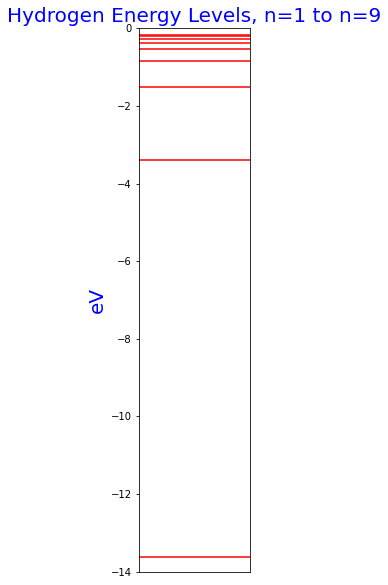

In [5]:
ys = []
for n in range(1, 10):
    ha = HydrogenicAtom(n=n)
    _, ev = ha.energy()
    ys.append((n, round(ev, 2)))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 10))
ax.set_ylim(-14.0, 0.0)
ax.set_xticks([])
ax.set_ylabel('eV', size=20, color='b')
ax.set_title('Hydrogen Energy Levels, n=1 to n=9', size=20, color='b')
for y in ys:
    ax.axhline(y[1], color='r')

## By numeric integration, what is the mean radius of 1s orbital?

Following the integrand given in Example 10.2, and adding some hints to the nueric integration. The `points` argument to `quad` tells the function the r values that the value ies within. To help the `quad` numeri integration function out, I took a guess that the mean radius is going to be within \\(10 \times a_0 \times n\\) radii of the nucleus. Also, I took 1 meter as the "infinity" for integration in this case.

In [10]:
ha = HydrogenicAtom(n=1, l=0, ml=0)

def integrand(r):
    return r**3 * ha.radial(r)**2

quad(integrand, 0, 1, points=[0, 10 * ha.a0 * ha.n])

(7.934974578483517e-11, 3.8150348949908406e-14)

Below is the solution to the analytical integration solution given by the book. It matches the numeric integration!

In [11]:
3 * ha.a0 / 2

7.935e-11

What about the 3s orbital? First numeric integration, then the numeric solution from the book.

In [13]:
ha = HydrogenicAtom(n=3, l=0, ml=0)

def integrand(r):
    return r**3 * ha.radial(r)**2

quad(integrand, 0, 1, points=[0, 10 * ha.a0 * ha.n])

(7.118296273936347e-10, 6.083642982150495e-11)

In [14]:
27 * ha.a0 / 2

7.1415e-10

What about the 3p orbital?

In [18]:
ha = HydrogenicAtom(n=3, l=1, ml=0)

def integrand(r):
    return r**3 * ha.radial(r)**2

quad(integrand, 0, 1, points=[0, 10 * ha.a0 * ha.n])

(6.598213399404118e-10, 3.765511206963294e-12)

In [16]:
25 * ha.a0 / 2

6.6125e-10